#### Setup altimetry from probe data

##### Read probe data

In [15]:
import pathlib
from cfdmod.use_cases.altimetry import *

csv_path = pathlib.Path("./fixtures/tests/probes.csv") 
probes = AltimetryProbe.from_csv(csv_path)
probes[:10]

[AltimetryProbe(coordinate=array([193., 167., 830.]), building_label='GB', section_label='G', probe_label='GB-000-G', case_label='0'),
 AltimetryProbe(coordinate=array([193., 122., 830.]), building_label='GB', section_label='H', probe_label='GB-000-H', case_label='0'),
 AltimetryProbe(coordinate=array([392.9,  77. , 830. ]), building_label='GA', section_label='I', probe_label='GA-000-I', case_label='0'),
 AltimetryProbe(coordinate=array([193.,  77., 830.]), building_label='GB', section_label='I', probe_label='GB-000-I', case_label='0'),
 AltimetryProbe(coordinate=array([392.9,  32. , 830. ]), building_label='GA', section_label='J', probe_label='GA-000-J', case_label='0'),
 AltimetryProbe(coordinate=array([193.,  32., 830.]), building_label='GB', section_label='J', probe_label='GB-000-J', case_label='0'),
 AltimetryProbe(coordinate=array([392.9, -13. , 830. ]), building_label='GA', section_label='K', probe_label='GA-000-K', case_label='0'),
 AltimetryProbe(coordinate=array([193., -13., 

##### Surface slicing

In [9]:
import trimesh

surface_mesh: trimesh.Trimesh = trimesh.load_mesh("./fixtures/tests/altimetry/terrain.stl")

sections = set([p.section_label for p in probes])
altimetry_list: list[AltimetrySection] = [] # For debug plotting purposes

for sec_label in sections:
    section_probes = [p for p in probes if p.section_label == sec_label]
    sheds_in_section = set([p.building_label for p in section_probes])
    shed_list: list[ShedProfile] = []
    
    for shed_label in sheds_in_section:
        building_probes = sorted(
            [p for p in section_probes if p.building_label == shed_label],
            key=lambda x: (x.coordinate[0], x.coordinate[1]),
        )
        shed = Shed(start_coordinate=building_probes[0].coordinate, end_coordinate=building_probes[1].coordinate)
        shed_list.append(shed)
 
    altimetry_section = AltimetrySection.from_points(sec_label, shed_list[0].start_coordinate, shed_list[0].end_coordinate)
    altimetry_section.slice_surface(surface_mesh)
    [altimetry_section.include_shed(s) for s in shed_list]
    
    altimetry_list.append(altimetry_section)
    
    print("Section: ", sec_label, "Buildings in section:", sheds_in_section)

Section:  F Buildings in section: {'GB'}
Section:  X Buildings in section: {'GD'}
Section:  D Buildings in section: {'GB'}
Section:  Z Buildings in section: {'GE'}
Section:  Q Buildings in section: {'GD'}
Section:  B Buildings in section: {'GA'}
Section:  K Buildings in section: {'GB', 'GA'}
Section:  G Buildings in section: {'GB'}
Section:  S Buildings in section: {'GD'}
Section:  L Buildings in section: {'GA'}
Section:  E Buildings in section: {'GB'}
Section:  P Buildings in section: {'GD'}
Section:  H Buildings in section: {'GB'}
Section:  R Buildings in section: {'GD'}
Section:  N Buildings in section: {'GE', 'GD', 'GC'}
Section:  M Buildings in section: {'GA'}
Section:  T Buildings in section: {'GC'}
Section:  O Buildings in section: {'GE', 'GD', 'GC'}
Section:  V Buildings in section: {'GD'}
Section:  I Buildings in section: {'GB', 'GA'}
Section:  J Buildings in section: {'GB', 'GA'}
Section:  W Buildings in section: {'GD'}
Section:  U Buildings in section: {'GC'}
Section:  A Bui

##### Plotting: Altimetry profiles

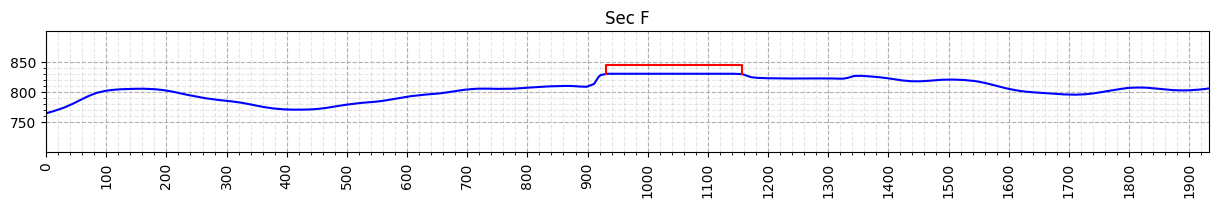

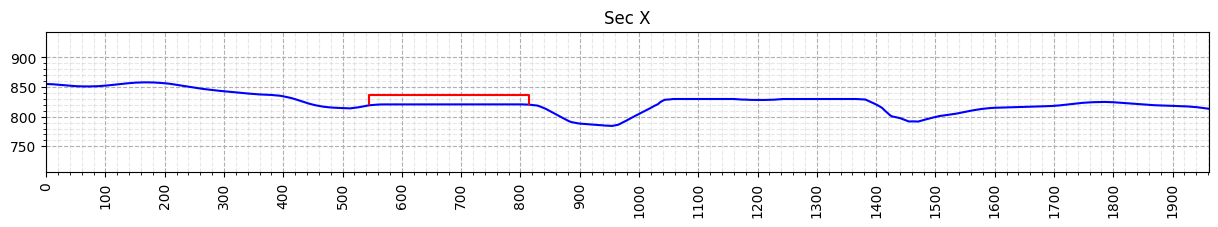

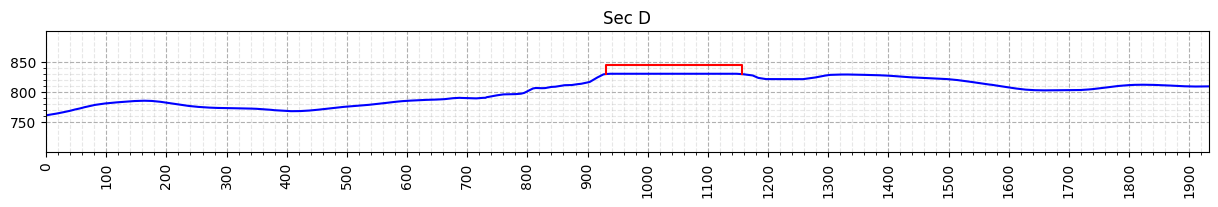

In [11]:
from cfdmod.utils import savefig_to_file
from cfdmod.use_cases.altimetry.plots import *
import matplotlib.pyplot as plt

output_path = pathlib.Path("./output")

# Plot only the first three profiles for examplification purposes
for altimetry_section in altimetry_list[:3]:
    filename = output_path / f"section-{altimetry_section.label}.png"
    fig, ax = plot_altimetry_profiles(altimetry_section)
    plt.show(fig)
    savefig_to_file(fig, filename)


##### DEBUG Plotting: Surface

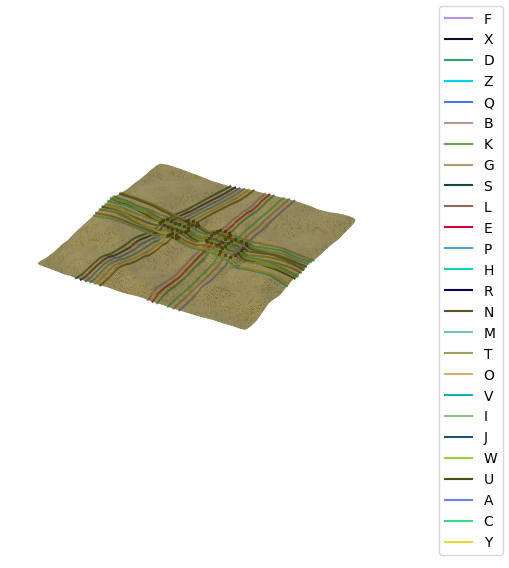

In [12]:
filename = output_path / "debug" / "surface.png"
fig, ax = plot_surface(surface_mesh, altimetry_list)
plt.show(fig)
savefig_to_file(fig, filename)

##### DEBUG Plotting: profiles

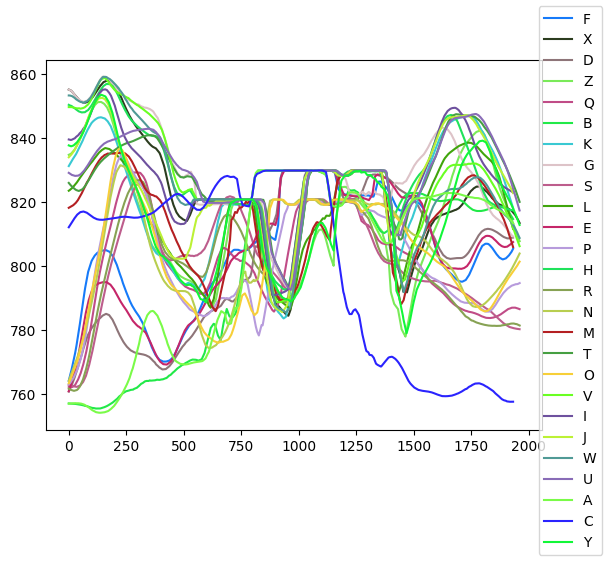

In [14]:
filename = output_path / "debug" / "profiles.png"
fig, ax = plot_profiles(altimetry_list)
plt.show(fig)
savefig_to_file(fig, filename)